In [18]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

stock = pd.read_csv("C:\\Users\\user\\2024_ai_test\\stock.csv")
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [19]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']
stock['Name'].value_counts()

Name
3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: count, Length: 2000, dtype: int64

In [20]:
stock_AP = stock[stock['Code']=='A265520']
stock_AP = stock_AP [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_AP

,Date,Open,High,Low,Close,Volume
4,20210601,29150,29150,28800,29050,131987
2004,20210602,29150,29400,29050,29150,112102
4004,20210603,29300,29650,29100,29350,176959
6004,20210604,29150,29350,28850,29100,106359
8004,20210607,29400,29450,28900,29050,114616
...,...,...,...,...,...,...
978004,20230523,21100,21300,20850,21100,75283
980004,20230524,20900,21300,20750,21200,45067
982004,20230525,21350,21450,21100,21150,79057
984004,20230526,21300,21350,20950,21000,84863


In [21]:

stock_AP['Date'].value_counts()

Date
20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: count, Length: 494, dtype: int64

In [22]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [23]:
dfx = stock_AP[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
4,0.733146,0.717877,0.744318,0.055660
2004,0.733146,0.731844,0.758523,0.046006
4004,0.741573,0.745810,0.761364,0.077491
6004,0.733146,0.729050,0.747159,0.043219
8004,0.747191,0.734637,0.750000,0.047227
...,...,...,...,...
978004,0.280899,0.279330,0.292614,0.028133
980004,0.269663,0.279330,0.286932,0.013464
982004,0.294944,0.287709,0.306818,0.029965
984004,0.292135,0.282123,0.298295,0.032783


In [24]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.346347,0.349501,0.353569,0.051672
std,0.228454,0.229086,0.227856,0.065955
min,0.000000,0.000000,0.000000,0.000000
25%,0.160112,0.159218,0.168324,0.022754
50%,0.327247,0.332402,0.332386,0.036928
75%,0.455056,0.452514,0.460227,0.061371
max,1.000000,1.000000,1.000000,1.000000


In [25]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [26]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.1758426966282256, 0.16592178770857027, 0.17954545454443438, 0.023678718571460016], [0.17191011235858478, 0.19162011173077306, 0.1965909090897921, 0.02711083904422838], [0.2033707865157114, 0.23184357541769918, 0.224431818180543, 0.05147112722583928], [0.25280898876262464, 0.2402234636858088, 0.24431818181679363, 0.04436124936952169], [0.23595505617844967, 0.25139664804328826, 0.2613636363621513, 0.06627924644809191], [0.26123595505471214, 0.27374301675824725, 0.2755681818166161, 0.04884922019989559], [0.2808988764029163, 0.279329608936987, 0.2926136363619738, 0.028132708011014432], [0.26966292134679964, 0.279329608936987, 0.28693181818018787, 0.013464397939561987], [0.2949438202230621, 0.2877094972050966, 0.3068181818164385, 0.029964790424625153], [0.29213483145903296, 0.28212290502635684, 0.29829545454375966, 0.0327833040688816]] -> [0.2994505494489041]


In [27]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [28]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 10, 20)         │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10, 1)          │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1957
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1238 
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 
Epoch 9/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 
Epoch 10/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 
Epoch 11/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 
Epoch 12/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 
Epoch 13/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 
Epoch 14/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 
Epoch 15/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 
Epoch

In [39]:
model.evaluate(test_X, test_y)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012  


0.0014070348115637898

In [33]:
y_pred = model.predict(test_X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [40]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0025955769081554693


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


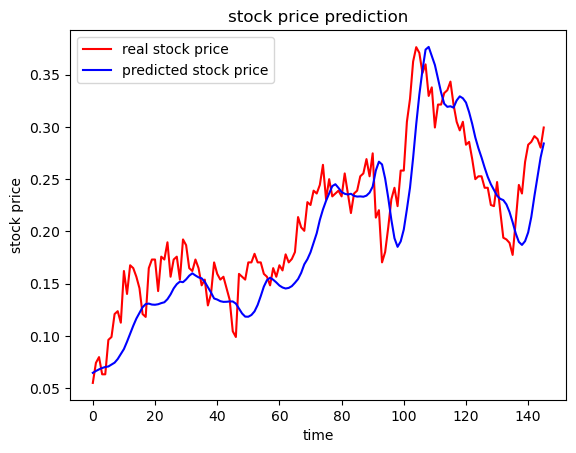

In [41]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()